In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_training.csv")
col = ['tweet_id', 'entity','sentiment','description']
df.columns = col

In [55]:
df.head(2)

,tweet_id,entity,sentiment,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [56]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     71655 non-null  int64 
 1   entity       71655 non-null  object
 2   sentiment    71655 non-null  object
 3   description  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


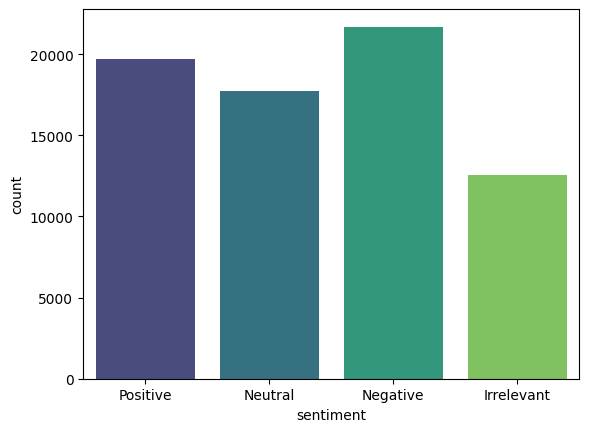

In [58]:
sns.countplot(df, x='sentiment', palette='viridis')
plt.show()

In [59]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
df['num_char'] = df['description'].apply(len)

In [61]:
df['num_word'] = df['description'].apply(lambda x: len(nltk.word_tokenize(x)))

In [62]:
df['num_sent'] = df['description'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [63]:
df.head(2)

,tweet_id,entity,sentiment,description,num_char,num_word,num_sent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1


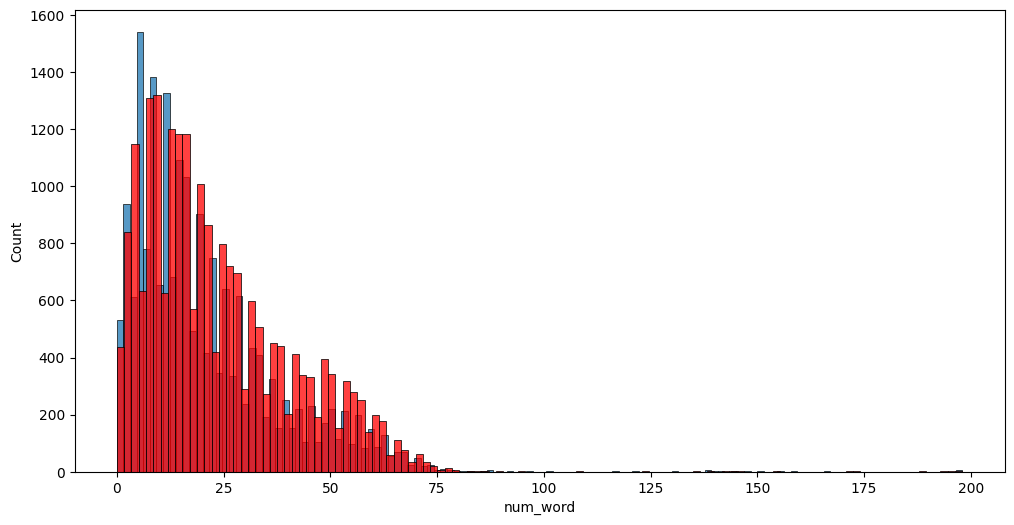

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['sentiment']=='Positive']['num_word'])
sns.histplot(df[df['sentiment']=='Negative']['num_word'], color='red')
plt.show()

# **Data Pre-Processing**

In [65]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [66]:
stopwords = set(stopwords.words('english'))
stems = PorterStemmer()

In [67]:
df.head()

,tweet_id,entity,sentiment,description,num_char,num_word,num_sent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,11,1


In [68]:
def transform_text(text):

    text = text.lower()
    text = re.sub('[^a-zA-Z0-9]+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords]
    tokens = [stems.stem(word) for word in tokens]
    
    return " ".join(tokens)

In [69]:
text = df['description'][0][:]
transform_text(text)

'come border kill'

In [70]:
df['cleaned_des'] = df['description'].apply(transform_text)

In [71]:
df.head(3)

,tweet_id,entity,sentiment,description,num_char,num_word,num_sent,cleaned_des
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1,im get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1,im come borderland murder


# **Word Cloud**

In [72]:
from wordcloud import WordCloud

In [73]:
def draw_cloud(data):
    wc = WordCloud(width=450, height=450, min_font_size=10, background_color='white').generate(data)
    plt.figure(figsize=(10,6))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

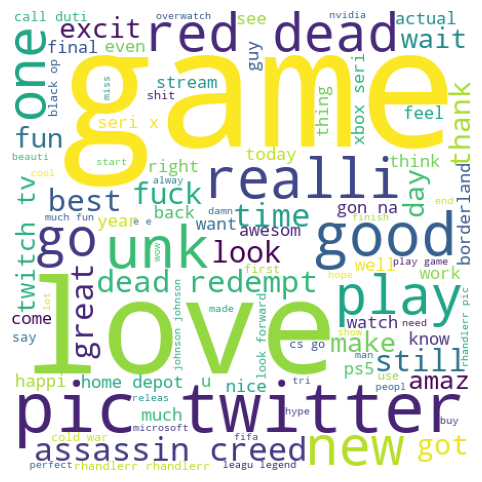

In [74]:
draw_cloud(df[df['sentiment']=='Positive']['cleaned_des'].str.cat(sep=" "))

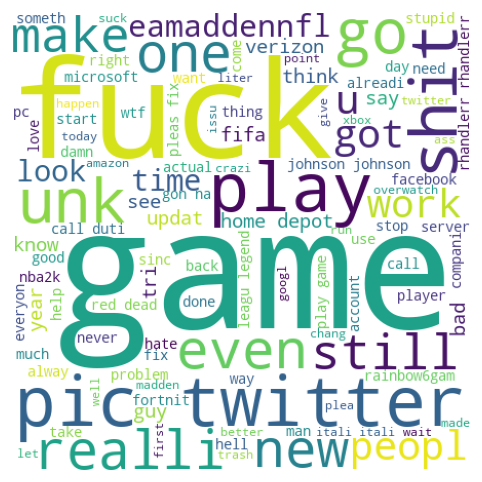

In [75]:
draw_cloud(df[df['sentiment']=='Negative']['cleaned_des'].str.cat(sep=" "))

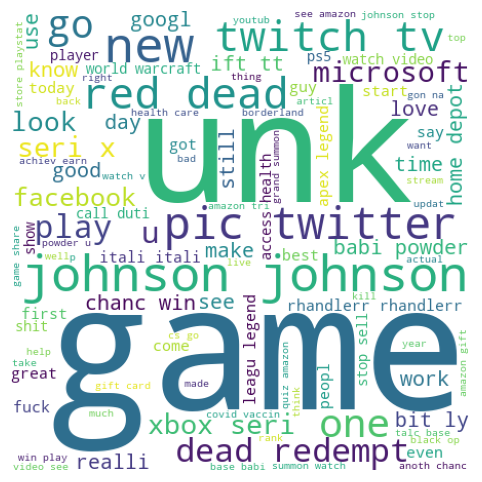

In [76]:
draw_cloud(df[df['sentiment']=='Neutral']['cleaned_des'].str.cat(sep=" "))

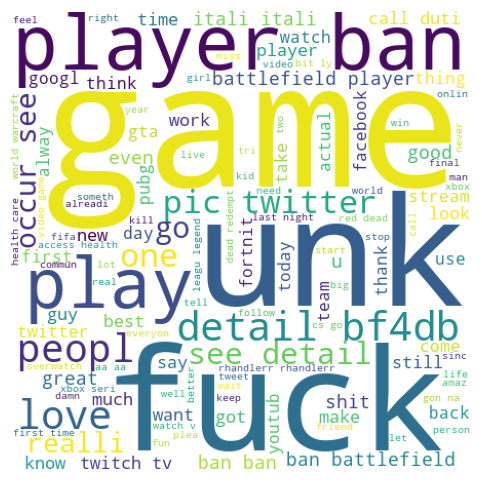

In [77]:
draw_cloud(df[df['sentiment']=='Irrelevant']['cleaned_des'].str.cat(sep=" "))

# **Text Vectorization**

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [80]:
x = tf.fit_transform(df['cleaned_des'])

In [81]:
y = df['sentiment']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)